## Table of Content

- [introduction](#intro)
- [Question 1](#question1)
- [Question 2](#Question2)
- [Question 3](#Question3)
- [Question 4](#Question4)
- [Question 5](#Question5)
- [Conclusion](#conclusion)

# Pakistan intellectual Capital

<a id='intro'></a>
### Introduction

In this project, i will be analysing apakistan intellecual capital data. where the analysis is based on three questions:


     1- Which area of interest/expertise is in abundance, and where more people are needed?
     2- How many professors we have in Data Science, Artificial Intelligence, and Machine Learning?
     3- Which research area is most common in Pakistan?
    
    The dataset has a total number of 1981 samples(rows), and 12 columns.
<a id='intro'></a>

In [2]:
#Import all the necessary libraries

import pandas as pd
import numpy as np
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Check the Dataset encoding
with open ('Pakistan Intellectual Capital - Computer Science - Ver 1.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
print(result)
#Open the dataset using panda and set the encoding to 'ISO-8859-1'
#Load the dataset and assign it to 'df'
df = pd.read_csv('Pakistan Intellectual Capital - Computer Science - Ver 1.csv', encoding = 'ISO-8859-1')
df.head()

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,1,Dr. Ihsan Ullah,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,NaN,France,NaN,"P2P Networks, Telecommunication Systems",NaN
1,2,Dr. Atiq Ahmed,University of Balochistan,Computer Science & IT,Balochistan,Associate Professor,PhD,NaN,France,NaN,"Wireless Networks, Telecommunication Systems, ...",NaN
2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN
3,4,Mr. Muhammad Khalid Badini,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,MS,NaN,NaN,NaN,Operating System & DBMS,On study leave
4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,DBMS,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   S#                                         1981 non-null   int64  
 1   Teacher Name                               1981 non-null   object 
 2   University Currently Teaching              1981 non-null   object 
 3   Department                                 1981 non-null   object 
 4   Province University Located                1981 non-null   object 
 5   Designation                                1918 non-null   object 
 6   Terminal Degree                            1440 non-null   object 
 7   Graduated from                             1142 non-null   object 
 8   Country                                    1200 non-null   object 
 9   Year                                       499 non-null    float64
 10  Area of Specialization/R

<a id='Question1'></a>
## Question1: Which department have more people, and where more people are needed?
<a id='Question1'></a>


In [5]:
#copy the original dataset in df_copy
df_copy = df.copy()

#Show the sample of how it looks
df_copy.head(3)

,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,1,Dr. Ihsan Ullah,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,NaN,France,NaN,"P2P Networks, Telecommunication Systems",NaN
1,2,Dr. Atiq Ahmed,University of Balochistan,Computer Science & IT,Balochistan,Associate Professor,PhD,NaN,France,NaN,"Wireless Networks, Telecommunication Systems, ...",NaN
2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN


In [6]:
#Convert the Column names to lower alphabets

df_copy = df_copy.rename(columns = {'University Currently Teaching' : 'current university', 
                                   'Teacher Name' : 'teacher',
                                   'Department':'department',
                                   'Province University Located' : 'location',
                                   'Designation' : 'designation',
                                   'Terminal Degree' : 'degree',
                                   'Graduated From' : 'graduated from',
                                   'Country':'country',
                                   'year': 'year',
                                   'Area of Specialization/Research Interests' : 'specialization',
                                   'Other Information' : 'other'})

#Take a look of how it looks
df_copy.head(3)

,S#,teacher,current university,department,location,designation,degree,Graduated from,country,Year,specialization,other
0,1,Dr. Ihsan Ullah,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,NaN,France,NaN,"P2P Networks, Telecommunication Systems",NaN
1,2,Dr. Atiq Ahmed,University of Balochistan,Computer Science & IT,Balochistan,Associate Professor,PhD,NaN,France,NaN,"Wireless Networks, Telecommunication Systems, ...",NaN
2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN


In [10]:
#check the number of unique entries under 'department' column
df_copy['department'].nunique()

#Copy the the column 'department' in df_copy snd store it in dept
dept = pd.DataFrame(df_copy['department'])

deprt = pd.DataFrame(dept)

#Rename the column name from 0 to count
departments = deprt.rename(columns = {0: 'count'})

#Count the Number of each area
departments_count = pd.DataFrame(departments['department'].value_counts())
departments_count.head()

#reset the index to 0
departments_count = departments_count.reset_index()

departments_count.head()

,index,department
0,Computer Science,1265
1,Computer Science & IT,86
2,Computer Engineering,81
3,Information Technology,78
4,Computer Science and IT,71


In [16]:
departments_count.head(-9)

,index,department
0,Computer Science,1265
1,Computer Science & IT,86
2,Computer Engineering,81
3,Information Technology,78
4,Computer Science and IT,71
5,Computer Sciences,59
6,Computing,49
7,Computer Science and Software Engineering,42
8,Computing & Information Sciences,38
9,Computer Science & Engineering,29


In [17]:
departmentsss = departments.reset_index()
departmentsss.head()
perc = departmentsss.groupby('department')['index'].count()/departmentsss.shape[0]
perce = perc * 100
perce

department
CS & IT                                                   0.757193
CS/IT                                                     0.605755
Computer Engineering                                      4.088844
Computer Science                                         63.856638
Computer Science & Engineering                            1.463907
Computer Science & IT                                     4.341242
Computer Science and Engineering                          1.261989
Computer Science and IT                                   3.584048
Computer Science and Information Technology               0.252398
Computer Science and Software Engineering                 2.120141
Computer Sciences                                         2.978294
Computer and Information Sciences                         1.009591
Computing                                                 2.473498
Computing & Information Sciences                          1.918223
Department of Computer Systems & Software Engineeri

In [18]:
#Rename the column names index to departments, and department to count
departments_count = departments_count.rename(columns = {'index' : 'departments', 'department' : 'count' })

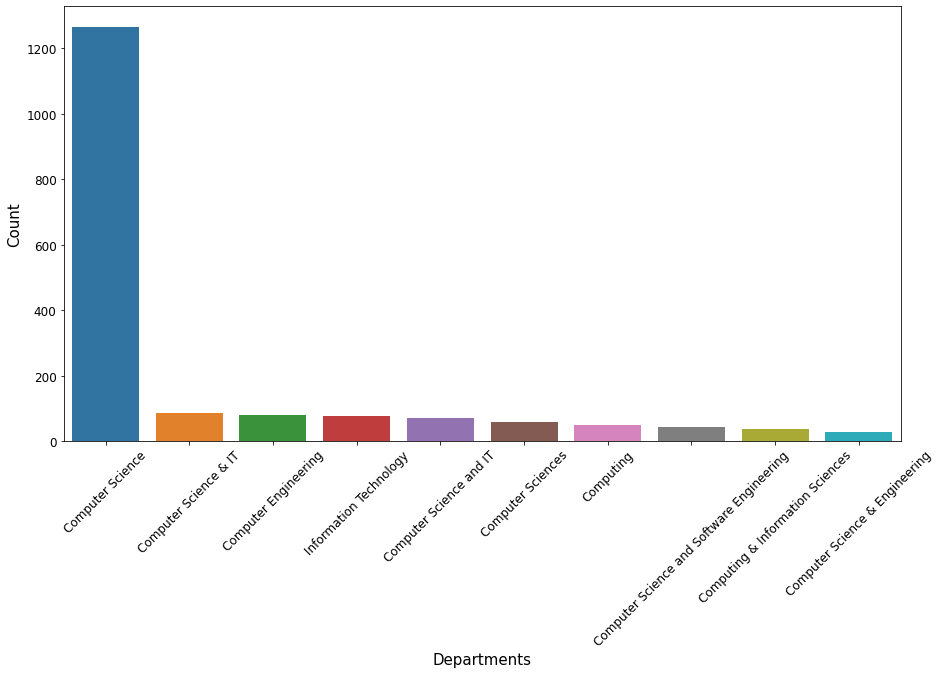

In [19]:
#Histogram using matplotlib
plt.figure(figsize = (15, 8))
sns.barplot(x = departments_count.loc[0:9, 'departments'], y = departments_count.loc[0:9, 'count'])
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Departments', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

The above bar chart clearly shows the areas in abundace which are:

    1- Computer Science
    2- Computer science and Information Technology
    3- Computer Engineering
    Etc.

In [20]:
#Drop all the unnecessary columns
df_copy.drop(['S#', 'other'], axis = 1, inplace=True)

<a id='Question2'></a>
## Question2: Which area of interest is in abundance, and where more people are needed?

<a id='Question2'></a>

In [21]:
#copy a new dataset from df_copy in df2
df2 = df_copy.copy()

specializations = pd.DataFrame(df2['specialization'])

#drop all the missing rows
specializations.dropna(inplace = True)

In [22]:
#convert all the entries in specialization column to lower case
specializations['specialization'] = specializations.specialization.str.lower()

#Replace all '.' with nospace('')
specializations['specialization'] = specializations.specialization.str.replace('.', '')

#replace all 'and' with ''
specializations['specialization'] = specializations.specialization.str.replace('and ', '')

#Split all the entries with a comma(,)
specializations['specialization'] = specializations.specialization.str.split(',')

C:\Users\nitda\AppData\Local\Temp/ipykernel_12312/1504388117.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  specializations['specialization'] = specializations.specialization.str.replace('.', '')


In [23]:
#extract all the entries in specialization column differently and store it to new dataframe
area_of_interest = []
for i in specializations['specialization']:
    for j in i:
            area_of_interest.append(j.strip())
            
df_area_of_interest = pd.DataFrame(area_of_interest)

#take a lool at the new data set
df_area_of_interest.head()

,0
0,p2p networks
1,telecommunication systems
2,wireless networks
3,telecommunication systems
4,multi-agent systems


In [24]:
#renaming  column name '0' to area of specialization

df_area = df_area_of_interest.rename(columns = {0: 'area of interest'})

#count the number of area of speciality in the dataframe df_area
tf_df_area = pd.DataFrame(df_area['area of interest'].value_counts())


#set the index to 0 to simplify ploting the variables

tf_df_area = tf_df_area.reset_index()
# changing columns names to make it more meaningful
tf_df_area = tf_df_area.rename(columns={'index': 'area_of_interest','area of interest': 'count'})
tf_df_area.head(12)

,area_of_interest,count
0,software engineering,67
1,machine learning,53
2,data mining,43
3,artificial intelligence,34
4,computer networks,29
5,computer vision,27
6,image processing,26
7,databases,19
8,human computer interaction,14
9,cloud computing,14


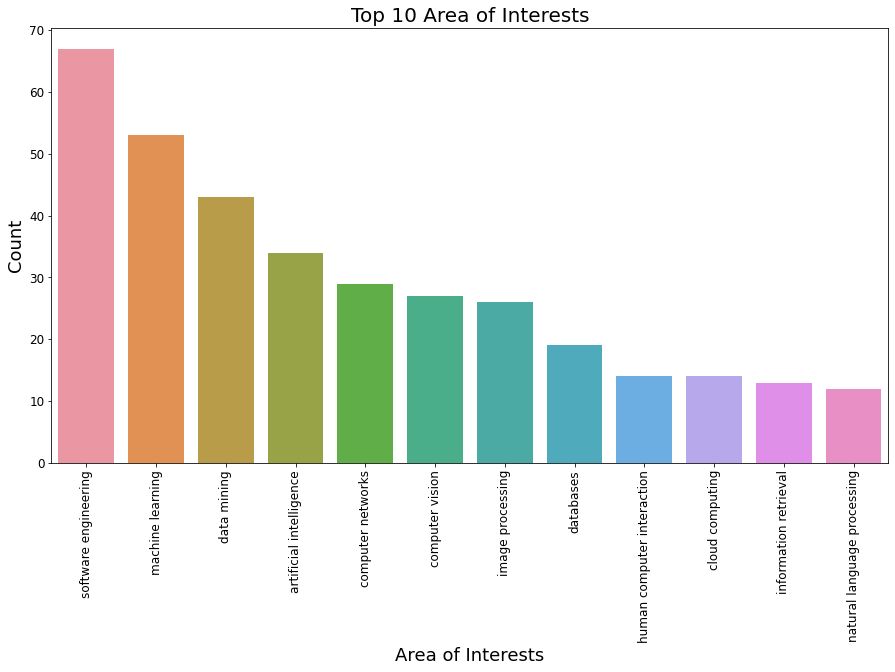

In [25]:
#plot a bar chart with area of interest on x axis, count on the y axis.
plt.figure(figsize=(15, 8))
sns.barplot(x=tf_df_area.loc[0:11, 'area_of_interest'], y=tf_df_area.loc[0:11, 'count'])
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Area of Interests", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("Top 10 Area of Interests", fontsize=20)
plt.show()

The above bar chart shows that the following are the area in abundace:
    
    1- Software Engineering
    2- Machine Learning
    3- Data Mining

And that the following are needing more people

    1- Machine Learning approaches for data intensive ....
    2- Human Machine Interface
    3- CMS

<a id='Question3'></a>
## Question3: How many professors do we have in Data Science, Artificial Intelligence, and Machine Learning?
<a id='Question3'></a>

In [26]:
#Copy the df_copy dataset and store in df3
df3 = df_copy.copy()

df3.head(3)

,teacher,current university,department,location,designation,degree,Graduated from,country,Year,specialization
0,Dr. Ihsan Ullah,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,NaN,France,NaN,"P2P Networks, Telecommunication Systems"
1,Dr. Atiq Ahmed,University of Balochistan,Computer Science & IT,Balochistan,Associate Professor,PhD,NaN,France,NaN,"Wireless Networks, Telecommunication Systems, ..."
2,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS


In [27]:
#Numbers in Data Science
no_in_ds = 0
#Number in Machine Learning
no_in_ml = 0
#Number in Artificial intellihence
no_in_ai = 0

for i in range(len(df_area)):
    if df_area['area of interest'][i] == 'machine learning':
        no_in_ml += 1
    if df_area['area of interest'][i] == 'data science':
        no_in_ds += 1
    if df_area['area of interest'][i] == 'artificial intelligence':
        no_in_ai += 1
#print(no_in_sf)
print('Number of Professors in Machine Learning is ', no_in_ml)
print('Number of Professors in Artificial Intelligence ', no_in_ai)
print('Number of Professors in Data Science ', no_in_ds)

Number of Professors in Machine Learning is  53
Number of Professors in Artificial Intelligence  34
Number of Professors in Data Science  8


## Which class of degree have highest number?

In [28]:
no_of_degree = df3['degree']

no_of_degree = pd.DataFrame(df3['designation'].value_counts())

no_of_degree = no_of_degree.rename(columns = {0: 'degree'})

no_of_degree = no_of_degree.reset_index()

no_of_degree = no_of_degree.rename(columns = {'index' : 'degree', 'designation' : 'count'})

no_of_degree.head(3)

,degree,count
0,Lecturer,783
1,Assistant Professor,705
2,Associate Professor,128


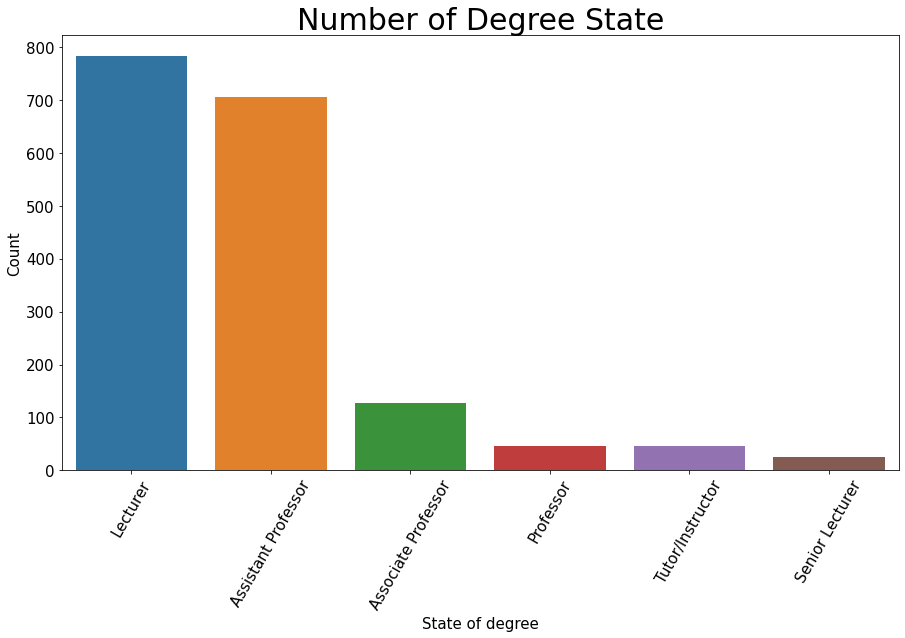

In [29]:
plt.figure(figsize= (15,8))
sns.barplot(x= no_of_degree.loc[0:5,'degree'], y = no_of_degree.loc[0:5,'count'])
plt.xticks(fontsize = 15, rotation = 60)
plt.yticks(fontsize = 15)
plt.xlabel('State of degree', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Number of Degree State', fontsize = 30)
plt.show()

<a id='Question4'></a>
## Question 4: Which Country have the highest number of Teachers?
<a id='Question4'></a>

In [30]:
countries = pd.DataFrame(df_copy['country'].copy())

countries.isnull().sum()

countries.dropna(inplace = True)

In [31]:
countries.head()

,country
0,France
1,France
2,Thailand
4,Thailand
5,Thailand


In [32]:
len(countries['country'].unique())

37

In [33]:
countries['country'] = countries['country'].str.strip()
#replacing macau with China and Urbana with USA
countries.loc[countries['country'] == 'Urbana', "country"] = 'USA'
countries.loc[countries['country'] == 'Macau', "country"] = 'China'

countries_count = pd.DataFrame(countries['country'].value_counts())

countries_count = countries_count.reset_index()


countries_count = countries_count.rename(columns = {'index': 'country', 'country': 'count'})

countries_count.head()

,country,count
0,Pakistan,794
1,UK,103
2,USA,58
3,Malaysia,28
4,France,27


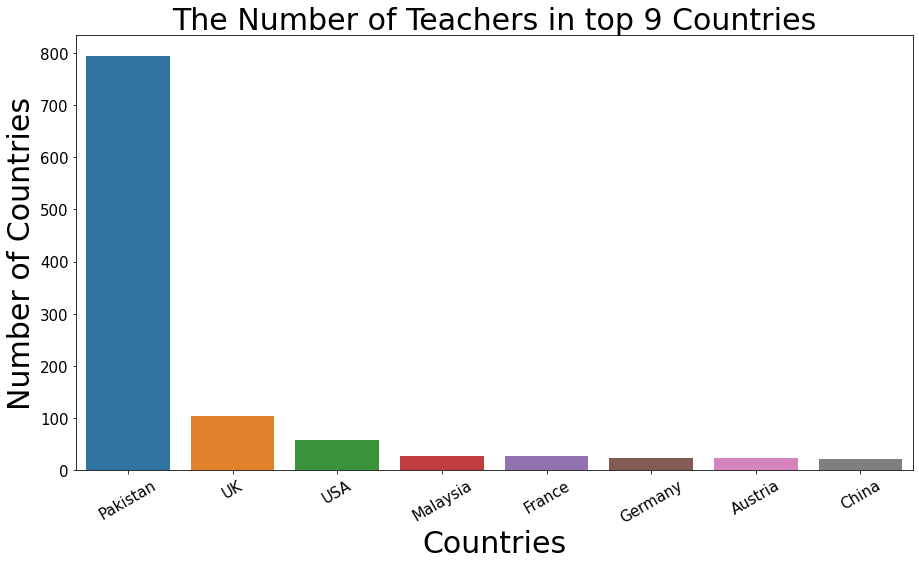

In [34]:
plt.figure(figsize = (15, 8))
sns.barplot(x = countries_count.loc[0:7, 'country'], y = countries_count.loc[0:7, 'count'])
plt.xticks(rotation = 30, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Countries', fontsize = 30)
plt.ylabel('Number of Countries', fontsize = 30)
plt.title('The Number of Teachers in top 9 Countries', fontsize = 30)
plt.show()

## Question 5: Which Country have the highest number of graduates?

In [35]:
#Graduated from 
grad = df_copy.copy()
grad.head(3)

,teacher,current university,department,location,designation,degree,Graduated from,country,Year,specialization
0,Dr. Ihsan Ullah,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,NaN,France,NaN,"P2P Networks, Telecommunication Systems"
1,Dr. Atiq Ahmed,University of Balochistan,Computer Science & IT,Balochistan,Associate Professor,PhD,NaN,France,NaN,"Wireless Networks, Telecommunication Systems, ..."
2,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS


In [36]:
graduated_column = pd.DataFrame(grad['Graduated from'])

graduated_column['Graduated from'] = graduated_column['Graduated from'].str.strip()

graduated_column = pd.DataFrame(graduated_column['Graduated from'].value_counts())

graduated_column.dropna(inplace = True)

graduated_column = graduated_column.reset_index()

graduated_column.head(3)

,index,Graduated from
0,FAST National University of Computer and Emer...,67
1,Sir Syed University of Engineering and Technology,47
2,National University of Sciences and Technology,45


In [37]:
graduated_column = graduated_column.rename(columns = {'index': 'graduated from', 'Graduated from': 'count'})

graduated_column.head(9)

,graduated from,count
0,FAST National University of Computer and Emer...,67
1,Sir Syed University of Engineering and Technology,47
2,National University of Sciences and Technology,45
3,University of the Punjab,34
4,NED University of Engineering And Technology,34
5,"International Islamic University,Islamabad",32
6,Hamdard University,31
7,Lahore University of Management Sciences,27
8,University of Engineering and Technology,18


C:\Users\nitda\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nitda\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


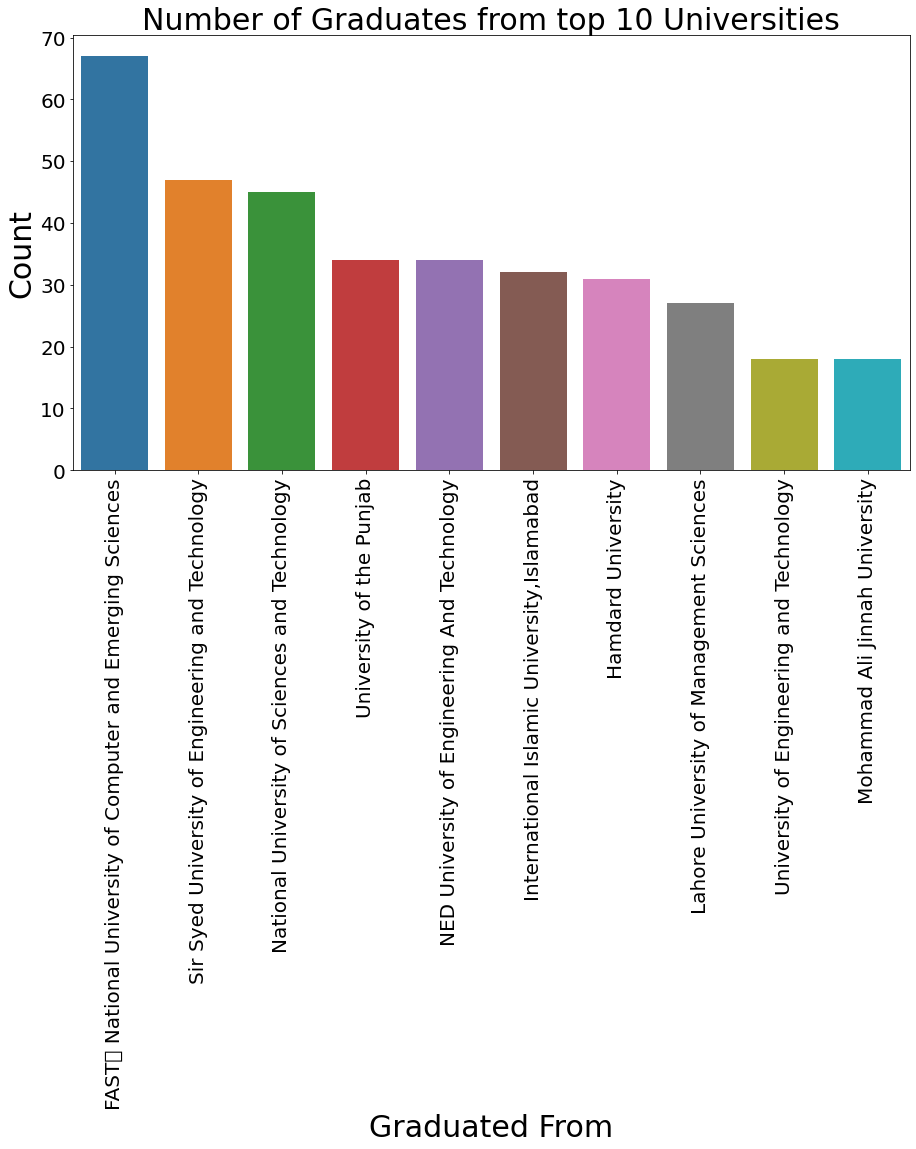

In [38]:
plt.figure(figsize = (15,8))
sns.barplot(x = graduated_column.loc[0:9, 'graduated from'], y = graduated_column.loc[0:9, 'count'])
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Graduated From', fontsize = 30)
plt.ylabel('Count', fontsize = 30)
plt.title('Number of Graduates from top 10 Universities', fontsize = 30)
plt.show()

<a id='conclusion'></a>
# Conclusion

In the above notebook we observe and answered 5 quetions from the "Pakistan Intellectual Capital - Computer Science - Ver 1.csv" dataset. The dataset have 1981 samples(rows) and 12 columns. The dataset is based on Pakistan Intellectual Capital. 

The questions we asked in the dataset and their answers are as follows:
    
### 1- Which Department have more students, and where more students are needed?
 #### The departments that have many students are:
         
- Computer Science Department; the department have the total number of 1265 students, which is **69.9%** of all the                  students.
- Computer Science and Information Technology; this department have a total number of 86 students, which is **4.3%** of all the students.
- Computer Engineering Department; this department have only 81 students, which is slightly differnt from Computer Science and Information Technology department. Computer Engineering Depatment contributes **4.0%** of all the students.
 #### The departments that needs more students are:
   >The departments that needs more students are; School of Information and Technology, which have **0.56%** of all the students. Computer science/IT, which have only **0.61%** of all the students. And Engineering, Science and Technology with **0.711%** all the students.
         

### 2- Which area of interest is in abundance, and where more people are needed?

#### The areas of interest in abundance are :

- Software Engineering; Software Engineering is the area of interest with the highest number of **67** partipants.
- Machine Learning; Machine learning have the total number of **53** participants, which makes it the second most interested area.
- Data Mininig; data mining is the third area of interest with total number of **43** participants.
    
#### And the areas that needs more people are
    The area of interest that needs more people are many, but some of them are:
- 3D Pose Estimation
- Big Data IOT
- Data Mining Big Data Analytics
    
    The above all have one participants.


### 3- How many professors dow we have in Data Science, Artificial Intelligence and Machine Learning?

- The total number of professors in Machine Learning is **53**
- The total number of professors in Artificial Intelligence is **34**
- The total number of professors in Data Science is **8**

### 4- Which countries have the highest teachers?

- Pakistan - **794**
- United Kingdom - **103**
- United State of America - **58**
    
<a id='conclusion'></a>